In [419]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
%matplotlib notebook

In [420]:
N = 10001
Nf = 3
t = np.arange(N, dtype=float)
#random periods between 10-2010 and convert to frequencies
Ts = np.random.rand(Nf)*2000+100
fs = 1./Ts
#fs = [0.001, 0.002, 0.005]
# random amplitudes
amp = np.random.rand(Nf)*200 + 100
#random phase
phi = np.random.rand(Nf)*2*np.pi
# calculate signal
h = np.zeros(N)
for j in range(len(fs)):
    h += amp[j] * np.sin(2*np.pi*t*fs[j]+phi[j])
# make noisy signal by adding white noise
hn = h + np.random.randn(N)*3*h + np.random.randn(N)*700

<IPython.core.display.Javascript object>


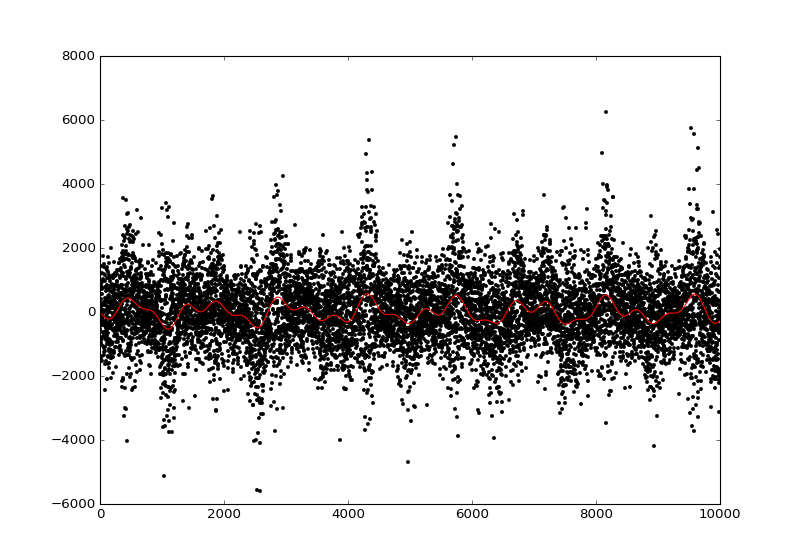

In [427]:
plt.figure(None, (10, 7))
plt.plot(t, hn, 'k.')
plt.plot(t, h, 'r-')
plt.show()

In [428]:
Hn = np.fft.fft(hn)
freq = np.fft.fftfreq(N)

In [429]:
len(freq), freq

(10001, array([  0.00000000e+00,   9.99900010e-05,   1.99980002e-04, ...,
         -2.99970003e-04,  -1.99980002e-04,  -9.99900010e-05]))

Frequencies in Hertz. Default 1 second. First freq is 0. 
Called the DC offset because it is a constant. 
cos(0) = 1 and it shifts things.

In [430]:
freq_ind = np.arange(1, N/2, dtype=int)
np.allclose(freq[freq_ind], -1 * freq[-freq_ind]) # Frequencies are mirrored

True

In [431]:
#calculate power spectual density
psd = abs(Hn[freq_ind]**2) + abs(Hn[-freq_ind]**2)

<IPython.core.display.Javascript object>


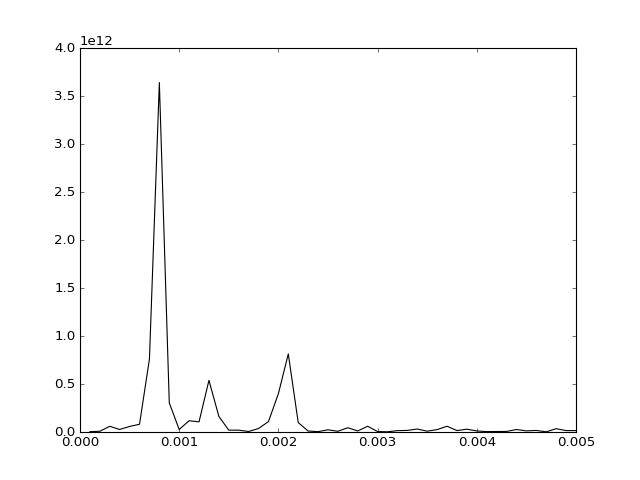

In [432]:
plt.figure()
plt.plot(freq[freq_ind[:50]], psd[:50], 'k-')
plt.show()

10001 10001 5000 5000 10001 (array([ 6,  7, 12, 20]),)
[ 0.00077146  0.00134542  0.00206045]
[ 0.00069993  0.00079992  0.00129987  0.00209979]


<IPython.core.display.Javascript object>


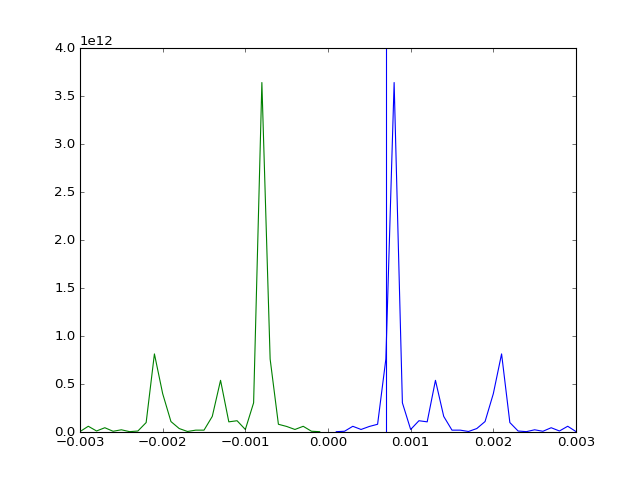

In [433]:
ind = np.where(psd > 0.4e12)
i = ind[0][0]
print(len(hn), len(Hn), len(freq_ind), len(psd), len(freq), ind)
print(np.sort(fs))
print(np.sort(freq[freq_ind[ind]]))
n = 30
plt.figure()
plt.plot(freq[freq_ind][:n],psd[:n])
plt.axvline(freq[freq_ind[i]])
plt.plot(freq[-freq_ind][:n],psd[:n])
plt.show()

In [434]:
Hn_cut=np.zeros_like(Hn)
Hn_cut[freq_ind[ind]] = Hn[freq_ind[ind]]
Hn_cut[-freq_ind[ind]] = Hn[-freq_ind[ind]]
hn_cut = np.fft.ifft(Hn_cut)
Hn_cut

array([ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j])

<IPython.core.display.Javascript object>


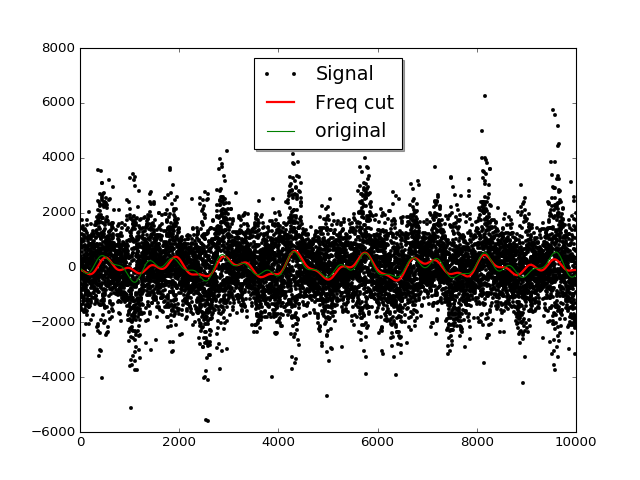

/usr/local/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [435]:
plt.figure()
plt.plot(t, hn, 'k.', label='Signal')
plt.plot(t, hn_cut, 'r-', lw=2, label='Freq cut')
plt.plot(t, h, 'g-', lw=1, label='original')
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

In [436]:
sigma = 100.
N = 10001
tt = np.arange(-N/2, N/2)
# Gaussian Distribution
g = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-tt**2/2/sigma**2)
hn_convolve = np.convolve(hn, g, 'same')

HG = Hn * np.fft.fft(g)
hn_manualsmooth = np.fft.ifft(HG)

<IPython.core.display.Javascript object>


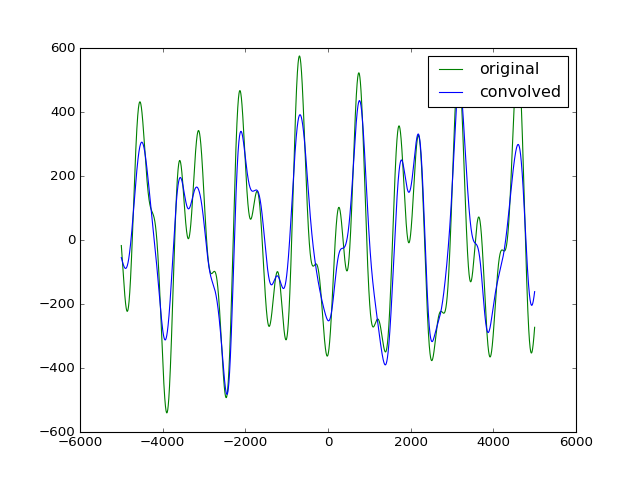

In [437]:
plt.figure()
#plt.plot(tt, g, 'r-') 
plt.plot(tt, h, 'g-', lw=1, label='original')
plt.plot(tt, hn_convolve, 'b-', label='convolved')
legend = plt.legend()
plt.show()

In [438]:
 x = np.array([1.000000, 0.616019, -0.074742, -0.867709, -1.513756, -1.814072, -1.695685, -1.238285, -0.641981, -0.148568, 0.052986, -0.099981, -0.519991, -1.004504, -1.316210, -1.277204, -0.840320, -0.109751, 0.697148, 1.332076, 1.610114, 1.479484, 1.039674, 0.500934, 0.100986, 0.011428, 0.270337, 0.767317, 1.286847, 1.593006, 1.522570, 1.050172, 0.300089, -0.500000, -1.105360, -1.347092, -1.195502, -0.769329, -0.287350, 0.018736, -0.003863, -0.368315, -0.942240, -1.498921, -1.805718, -1.715243, -1.223769, -0.474092, 0.298324, 0.855015, 1.045127, 0.861789, 0.442361, 0.012549, -0.203743, -0.073667, 0.391081, 1.037403, 1.629420, 1.939760, 1.838000, 1.341801, 0.610829, -0.114220, -0.603767, -0.726857, -0.500000, -0.078413, 0.306847, 0.441288, 0.212848, -0.342305, -1.051947, -1.673286, -1.986306, -1.878657, -1.389067, -0.692377, -0.032016, 0.373796, 0.415623, 0.133682, -0.299863, -0.650208, -0.713739, -0.399757, 0.231814, 0.991509, 1.632070, 1.942987, 1.831075, 1.355754, 0.705338, 0.123579, -0.184921, -0.133598, 0.213573, 0.668583, 0.994522, 1.000000])

In [439]:
N = len(x)
def reft(k):
    return np.array([x[n] * np.cos(2*np.pi*k*n / N) for n in range(N)])
  
def imft(k):
    return np.array([-x[n] * np.sin(2*np.pi*k*n / N) for n in range(N)])

def co_reft(k):
    return reft(k).sum()
 
def co_imft(k):
    return imft(k).sum()

<IPython.core.display.Javascript object>


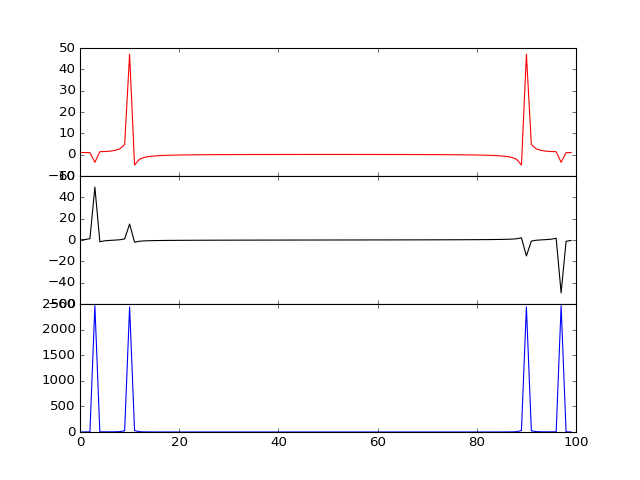

In [440]:
f, ax = plt.subplots(3, sharex=True)
reft_hist = np.array([co_reft(k) for k in range(N)])
imft_hist = np.array([co_imft(k) for k in range(N)])
psd = reft_hist**2 + imft_hist**2
ax[0].plot(reft_hist, c='r')
ax[1].plot(imft_hist, c='k')
ax[2].plot(psd)
f.subplots_adjust(hspace=0)

In [441]:
np.where(psd > 100), co_reft(3)+co_imft(3)

((array([ 3, 10, 90, 97]),), 45.970511895563945)

45.9705118956


<IPython.core.display.Javascript object>


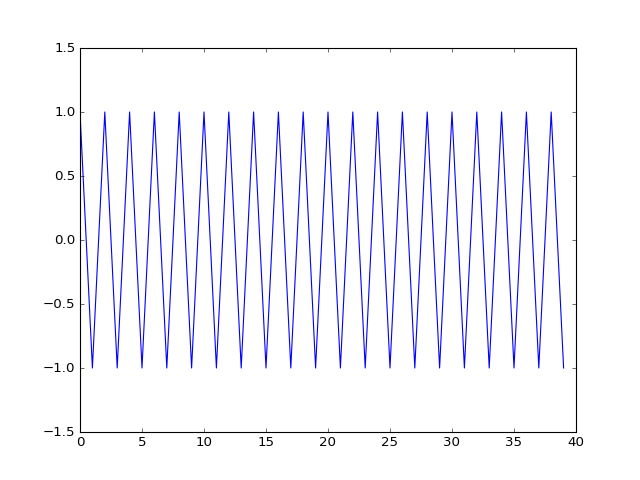

In [18]:
freq = co_reft(3)+co_imft(3)
print(freq)
plt.figure()
#plt.plot((co_reft(3)+co_imft(3)) * (reft(3) + imft(3)) / N)
plt.plot([ np.cos(2*np.pi*3*t)*(np.cos(np.pi*(t**2))-j*np.sin(np.pi*(t**2)))  for t in range(-20, 20)])
plt.show()

In [86]:
reft(3).sum()

-3.5842409442892169

In [20]:
f = lambda t: 5 + 2*np.cos(2*np.pi*t-np.pi/2) + 3*np.cos(4*np.pi*t)

In [442]:
N = 100
Nf = 3
t = np.arange(N, dtype=float) #np.linspace(0, 2*np.pi, N, dtype=float)
#random periods between 10-2010 and convert to frequencies
Ts = np.random.rand(Nf)*2000+100
fs = 1./Ts
fs = [0, 1, 1]
# random amplitudes
#amp = np.random.rand(Nf)*200 + 100
#random phase
phi = np.random.rand(Nf)*2*np.pi
# calculate signal
h = np.zeros(N)
for k, freq in enumerate(range(len(fs))):
    h +=  np.sin(2*np.pi * freq * (i/N) * t)
    
h = np.zeros(N)
num_curves = 4
squares = []
square = lambda k: (4/np.pi) * np.sin(2*np.pi * (2*k-1) * (1 / N) * t - np.pi) / (2*k-1)
for k in range(1, 1+num_curves):
    print('freq%s:'%k, (2*k-1) * (1 / N))
    points = square(k)
    squares.append(points)
    h += points
    
curve = np.sin(2*np.pi * 1 * (1/N) * t) + np.sin(2*np.pi * 1 * (3/N) * t)
plt.figure()
plt.plot(t, h, 'r-')
for s in squares:
    plt.plot(t, s, 'b-')
plt.show()


freq1: 0.01
freq2: 0.03
freq3: 0.05
freq4: 0.07


<IPython.core.display.Javascript object>

In [284]:
Hn = np.fft.fft(h)
freq = np.fft.fftfreq(N)
freq_ind = np.arange(1, N/2, dtype=int)
psd = abs(Hn[freq_ind]**2) + abs(Hn[-freq_ind]**2)

<IPython.core.display.Javascript object>


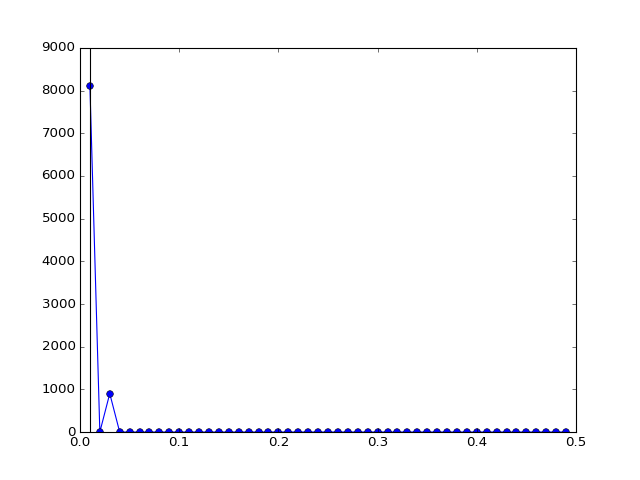

(array([0, 2]),)
[ 0.01  0.03]


In [293]:
plt.figure()
plt.plot(freq[freq_ind], psd, 'bo-')
ind = np.where(psd > 10)
i = ind[0][0]
print(ind)
print(np.sort(freq[freq_ind[ind]]))
plt.axvline(freq[freq_ind[i]], c='k')
plt.show()

<IPython.core.display.Javascript object>


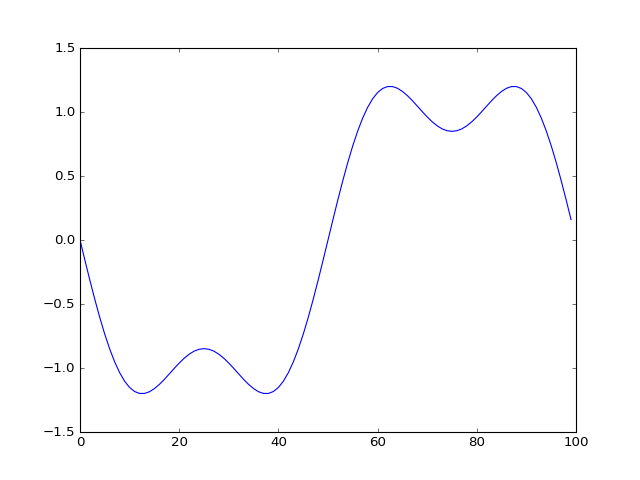

/usr/local/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [286]:
Hn_cut=np.zeros_like(Hn)
Hn_cut[freq_ind[ind]] = Hn[freq_ind[ind]]
Hn_cut[-freq_ind[ind]] = Hn[-freq_ind[ind]]
hn_cut = np.fft.ifft(Hn_cut)

plt.figure()
plt.plot(t, hn_cut)
plt.show()

<IPython.core.display.Javascript object>


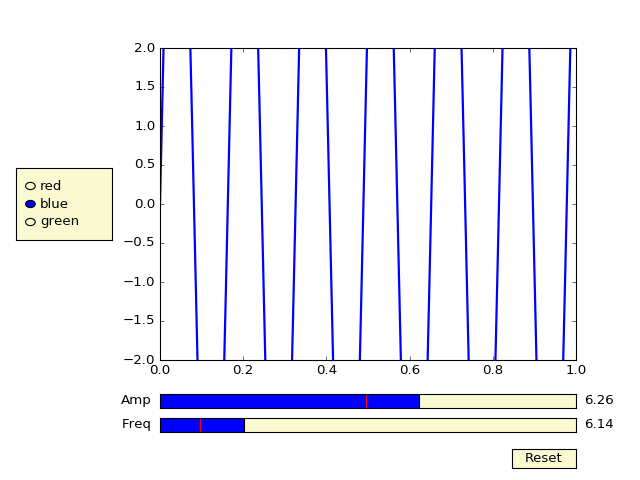

In [417]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t,s, lw=2, color='red')
plt.axis([0, 1, -2, 2])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
axamp  = plt.axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)

def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], axisbg=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)
def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()